In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset weatherHistory.csv

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Get rid of non-numerical columns of the dataset

In [3]:
df1=df[df.columns.difference(['Formatted Date', "Summary", 'Precip Type', 'Daily Summary', 'Loud Cover'])]
df1.head()

,Apparent Temperature (C),Humidity,Pressure (millibars),Temperature (C),Visibility (km),Wind Bearing (degrees),Wind Speed (km/h)
0,7.388889,0.89,1015.13,9.472222,15.8263,251.0,14.1197
1,7.227778,0.86,1015.63,9.355556,15.8263,259.0,14.2646
2,9.377778,0.89,1015.94,9.377778,14.9569,204.0,3.9284
3,5.944444,0.83,1016.41,8.288889,15.8263,269.0,14.1036
4,6.977778,0.83,1016.51,8.755556,15.8263,259.0,11.0446


### Use 'Temperature (C)' as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(45.125, 0.5, 'Temperature (C)')

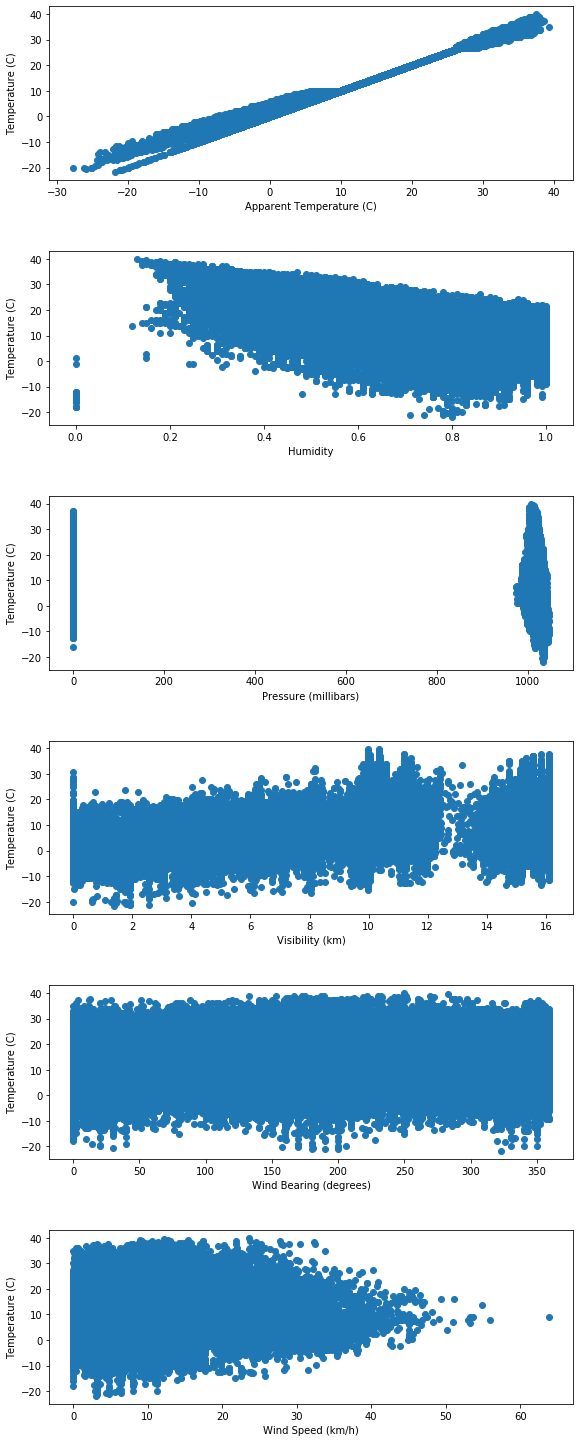

In [4]:
fig, axs = plt.subplots(6, 1)
fig.set_figwidth(8)
fig.set_figheight(20)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df1['Apparent Temperature (C)'], df1['Temperature (C)'])
axs[0].set_xlabel('Apparent Temperature (C)')
axs[0].set_ylabel('Temperature (C)')

axs[1].scatter(df1['Humidity'], df1['Temperature (C)'])
axs[1].set_xlabel('Humidity')
axs[1].set_ylabel('Temperature (C)')

axs[2].scatter(df1['Pressure (millibars)'], df1['Temperature (C)'])
axs[2].set_xlabel('Pressure (millibars)')
axs[2].set_ylabel('Temperature (C)')

axs[3].scatter(df1['Visibility (km)'], df1['Temperature (C)'])
axs[3].set_xlabel('Visibility (km)')
axs[3].set_ylabel('Temperature (C)')

axs[4].scatter(df1['Wind Bearing (degrees)'], df1['Temperature (C)'])
axs[4].set_xlabel('Wind Bearing (degrees)')
axs[4].set_ylabel('Temperature (C)')

axs[5].scatter(df1['Wind Speed (km/h)'], df1['Temperature (C)'])
axs[5].set_xlabel('Wind Speed (km/h)')
axs[5].set_ylabel('Temperature (C)')




### Leave only one feature that has a linear relationship with the target variable.

In [5]:
df=df1[['Humidity','Temperature (C)']]
df

,Humidity,Temperature (C)
0,0.89,9.472222
1,0.86,9.355556
2,0.89,9.377778
3,0.83,8.288889
4,0.83,8.755556
...,...,...
96448,0.43,26.016667
96449,0.48,24.583333
96450,0.56,22.038889
96451,0.60,21.522222


### Divide the dataset into training and test sets with the ratio 80:20.

In [6]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Temperature (C)'])],df['Temperature (C)'], test_size=0.2, random_state=42)

### Implement a function fit_ridge_regression

In [7]:
def fit_ridge_regression(data_vector, response_vector, l=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :param l: ridge variable
    :return: numpy array beta of coefficients of the regression
    """

    import numpy as np
    col_ones = np.ones([data_vector.shape[0], 1])
    data_vector = np.hstack((col_ones, data_vector))
    I=np.identity(data_vector.shape[1]) 
    inv=np.linalg.inv(np.dot(data_vector.T, data_vector )+l*I)
    beta=np.dot(np.dot(inv, data_vector.T), response_vector)
  
    return beta
fit_ridge_regression(xTrain,yTrain)

array([ 34.64024183, -30.89099086])

In [8]:
from sklearn.model_selection import train_test_split
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(df1[df1.columns.difference(['Temperature (C)'])],df1['Temperature (C)'], test_size=0.2, random_state=42)

In [9]:
fit_ridge_regression(xTrain1,yTrain1)

array([ 2.82649213e+00,  8.72594762e-01, -1.41644329e+00, -2.03026784e-04,
        8.65788149e-03, -4.03695888e-04,  7.97937852e-02])

### Implement a function fit_polynomial_regression

In [10]:
def fit_polynomial_regression(data_vector, response_vector, degree=2):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    import numpy as np
    data_vector=[]
    for i in range(degree+1):
        x=np.array(xTrain)** i
        x=x.reshape(xTrain.shape[0])
        data_vector.append(x)

    data_vector=pd.DataFrame(data_vector)
    inv=np.linalg.inv(np.dot(data_vector, data_vector.T ))
    beta=np.dot(np.dot(inv, data_vector), response_vector)
    
    return beta
fit_polynomial_regression(xTrain,yTrain,3)

array([  23.02581282,   43.92096149, -140.10803602,   79.15189351])

### Use the resulting train and test sets with the previous 2 functions to fit ridge regression and polynomial regression lines.

[ 34.64024183 -30.89099086]


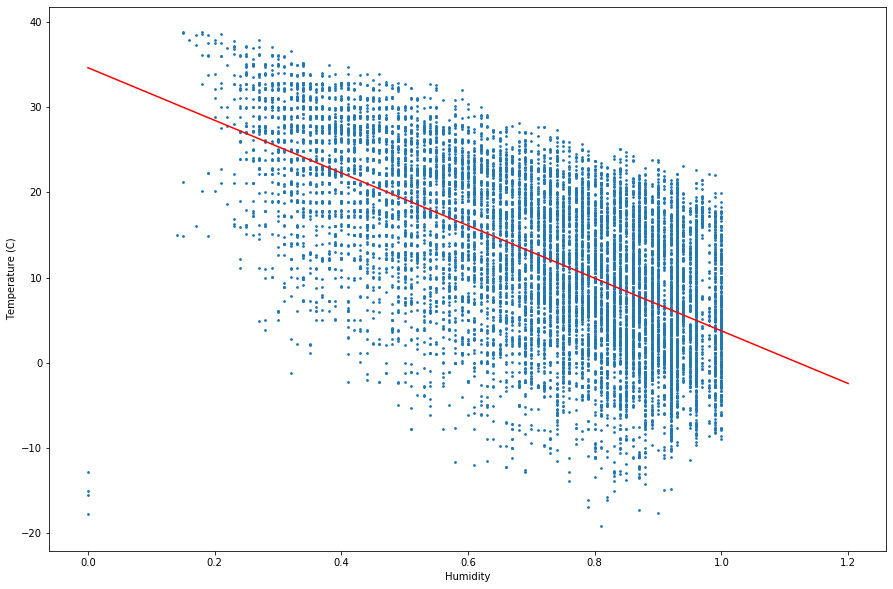

In [11]:
#ridge regression
plt.figure(figsize=(15,10))
plt.scatter(xTest, yTest, s=3)
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

beta = fit_ridge_regression(xTrain, yTrain)
print(beta)
curve_x = np.arange(0, 1.4, 0.2)
curve_y = [beta[0] + beta[1]*x for x in curve_x]
plt.plot(curve_x, curve_y, color='red')

plt.show()

[ 2.82649213e+00  8.72594762e-01 -1.41644329e+00 -2.03026784e-04
  8.65788149e-03 -4.03695888e-04  7.97937852e-02]


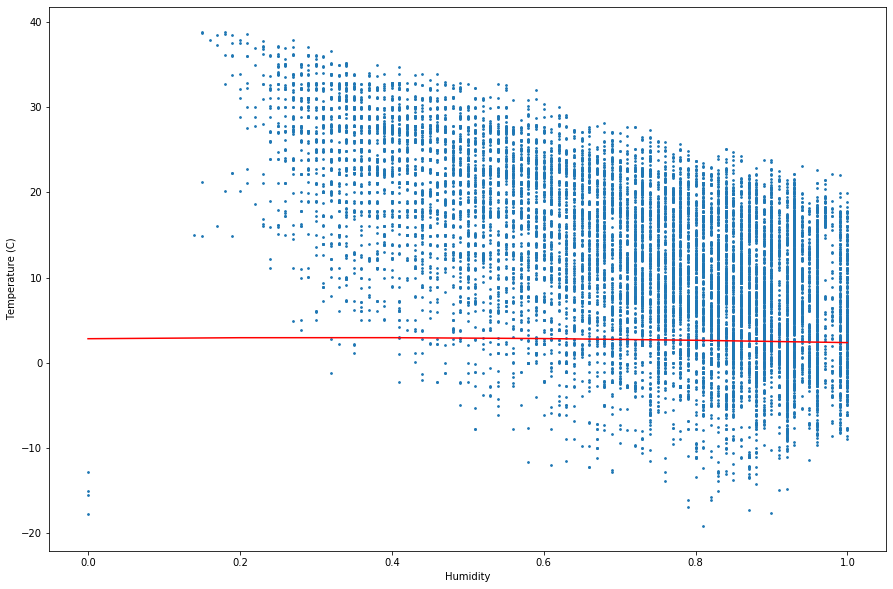

In [15]:
#ridge regression
plt.figure(figsize=(15,10))
plt.scatter(xTest, yTest, s=3)
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

beta11 = fit_ridge_regression(xTrain1, yTrain1)
print(beta11)
curve_x = np.arange(0, 1.2, 0.2)
curve_y = [sum(beta11[i] * x ** i for i in range(len(beta11))) for x in curve_x]
plt.plot(curve_x, curve_y, color='red')

plt.show()

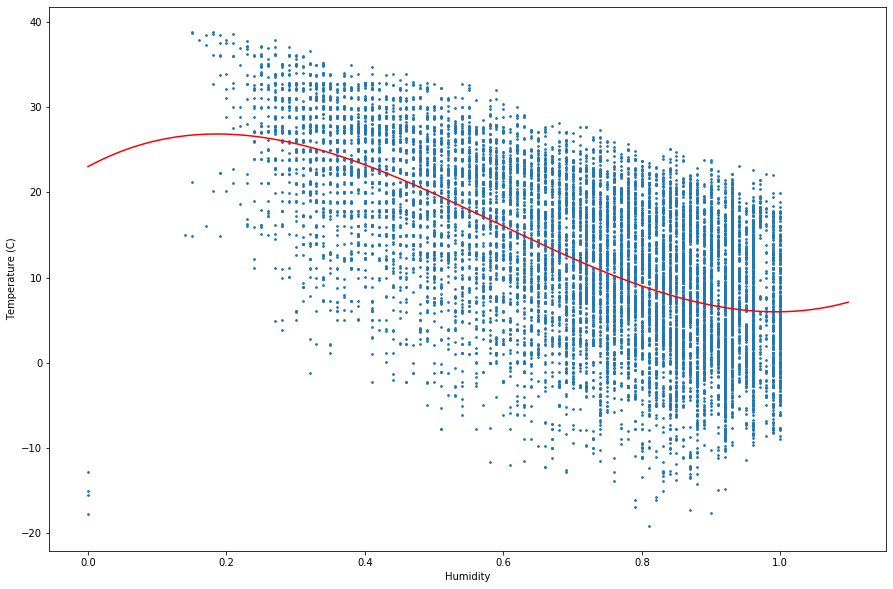

In [17]:
#polynomial regression
plt.figure(figsize=(15,10))
plt.scatter(xTest, yTest, s=3)
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

beta1 = fit_polynomial_regression(xTrain, yTrain, degree=3)
curve_x = np.arange(0, 1.1, 0.002)
curve_y = [sum(beta1[i] * x ** i for i in range(len(beta1))) for x in curve_x]
plt.plot(curve_x, curve_y, color='red')

plt.show()

### Calculate RMSE (root mean squared error) for ridge and polynomial regressions

In [29]:
#With my function  for ridge
from sklearn.metrics import mean_squared_error

col_ones = np.ones([xTest.shape[0], 1])
data_vector = np.hstack((col_ones, xTest))
col_ones1 = np.ones([xTrain.shape[0], 1])
data_vector_Train=np.hstack((col_ones1, xTrain))
l=1.5
y_pred = np.dot(data_vector, fit_ridge_regression(xTrain, yTrain,l).T) 
y_test_predict= np.dot(data_vector_Train, fit_ridge_regression(xTrain, yTrain,l).T) 
# evaluating the model on training dataset
rmse_test = np.sqrt(mean_squared_error(yTest, y_pred))

# evaluating the model on test dataset
rmse_train = np.sqrt(mean_squared_error(yTrain, y_test_predict))
print(rmse_test,rmse_train)

7.4621509394001615 7.3845381782412485


In [33]:
#With my function for polynomial regression
from sklearn.metrics import mean_squared_error
data_vector=[]
degree=5
for i in range(degree+1):
    x=np.array(xTest)** i
    x=x.reshape(xTest.shape[0])
    data_vector.append(x)
data_vector=pd.DataFrame(data_vector).T

data_vector_Train=[]
for i in range(degree+1):
    x=np.array(xTrain)** i
    x=x.reshape(xTrain.shape[0])
    data_vector_Train.append(x)
data_vector_Train=pd.DataFrame(data_vector_Train).T

y_pred = np.dot(data_vector, fit_polynomial_regression(xTrain, yTrain,degree).T) 
y_test_predict= np.dot(data_vector_Train, fit_polynomial_regression(xTrain, yTrain,degree).T) 

rmse_test = np.sqrt(mean_squared_error(yTest, y_pred))


rmse_train = np.sqrt(mean_squared_error(yTrain, y_test_predict))
print(rmse_test,rmse_train)

7.402309039192217 7.318415745820278


### Now fit the ridge and polynomial regressions to your data using sklearn and compare the results with your own fit_1d_linear_regression function. Use RMSE for comparison.

In [30]:
# ridge regressions
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


clf = Ridge(alpha=l)
clf.fit(xTrain, yTrain)

# predicting on training data-set
y_train_predicted = clf.predict(xTrain)

# predicting on test data-set
y_test_predict = clf.predict(xTest)

# evaluating the model on training dataset
rmse_train_f = np.sqrt(mean_squared_error(yTrain, y_train_predicted))

# evaluating the model on test dataset
rmse_test_f = np.sqrt(mean_squared_error(yTest, y_test_predict))
print(rmse_test_f,rmse_train_f)

7.462157461207592 7.3845366604579254


In [34]:
#polynomial regression
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=degree)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(np.array(xTrain).reshape(-1, 1))

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, yTrain)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(np.array(xTest).reshape(-1, 1)))

# evaluating the model on training dataset
rmse_train_p = np.sqrt(mean_squared_error(yTrain, y_train_predicted))

# evaluating the model on test dataset
rmse_test_p = np.sqrt(mean_squared_error(yTest, y_test_predict))
print(rmse_test_p,rmse_train_p)

7.402309039296093 7.3184157458202845


In [24]:
def fit_1d_linear_regression(data_vector, response_vector):
 
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    import numpy as np
    col_ones = np.ones([data_vector.shape[0], 1])
    data_vector = np.hstack((col_ones, data_vector))
    inv=np.linalg.inv(np.dot(data_vector.T, data_vector ))
    b=np.dot(np.dot(inv, data_vector.T), response_vector)
    
    return b

col_ones = np.ones([xTest.shape[0], 1])
data_vector = np.hstack((col_ones, xTest))
y_pred = np.dot(data_vector, fit_1d_linear_regression(xTrain, yTrain).T )

print('Root mean squared error: %.4f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))


Root mean squared error: 7.4622


### Use any additional visualizations that may help during your analysis.

degree, rmse_train, rmse_test
1 7.38 7.46
2 7.37 7.44
3 7.34 7.42
4 7.32 7.41
5 7.32 7.4
6 7.31 7.39
7 7.31 7.39
8 7.31 7.39
9 7.3 7.39
10 7.3 7.39


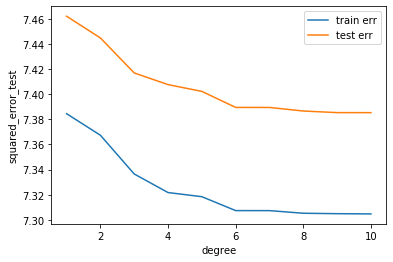

In [57]:
print('degree, rmse_train, rmse_test')
train_errors = []
test_errors = []
for n in range(1, 11):
    poly_features = PolynomialFeatures(degree=n)
    X_train_poly = poly_features.fit_transform(np.array(xTrain).reshape(-1, 1))
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, yTrain)
    y_train_predicted = poly_model.predict(X_train_poly)
    y_test_predict = poly_model.predict(poly_features.fit_transform(np.array(xTest).reshape(-1, 1)))
    squared_error_train  = np.sqrt(mean_squared_error(yTrain, y_train_predicted))
    squared_error_test = np.sqrt(mean_squared_error(yTest, y_test_predict))
    print(n, squared_error_train.round(2), squared_error_test.round(2))
    train_errors.append(squared_error_train)
    test_errors.append(squared_error_test)
    
plt.plot(range(1, 1 + len(train_errors)), train_errors, label='train err')
plt.xlabel('degree')
plt.ylabel('squared_error_train')


plt.plot(range(1, 1 + len(test_errors)), test_errors, label='test err')
plt.xlabel('degree')
plt.ylabel('squared_error_test')

plt.legend()
plt.show()